      Iter       Train Loss   Remaining Time 
         1           1.0190           17.69s
         2           0.9192           18.86s
         3           0.8272           17.71s
         4           0.7834           16.86s
         5           0.7109           16.52s
         6           0.6368           16.77s
         7           0.5797           16.64s
         8           0.5610           16.16s
         9           0.5185           15.94s
        10           0.4984           15.59s
        20           0.1999           14.42s
        30           0.1313           13.19s
        40           0.0790           12.55s
        50           0.0511           11.80s
        60           0.0352           11.17s
        70           0.0245           10.48s
        80           0.0162            9.86s
        90           0.0114            9.23s
       100           0.0077            8.65s
       200           0.0004            2.72s
      Iter       Train Loss   Remaining Time 
        

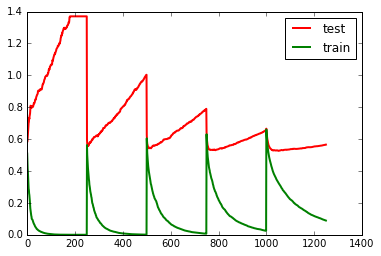

In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

d = pd.read_csv("Downloads/gbm_data.csv")
y = d.ix[:, 0]
X = d.ix[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

scores_test = []
scores_train = []

for i in [1, 0.5, 0.3, 0.2, 0.1]:
    gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    gbc.fit(X_train, y_train)
    for i, pred in enumerate(gbc.staged_decision_function(X_test)):
        scores_test.append(log_loss(y_test, 1 / (1 + np.exp(-pred))))

    for i, pred in enumerate(gbc.staged_decision_function(X_train)):
        scores_train.append(log_loss(y_train, 1 / (1 + np.exp(-pred))))

    %matplotlib inline
    plt.figure()
    plt.plot(scores_test, 'r', linewidth=2)
    plt.plot(scores_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [10]:
gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=0.2)
gbc.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.2613           19.68s
         2           1.1715           19.11s
         3           1.1009           18.95s
         4           1.0529           18.83s
         5           1.0130           18.73s
         6           0.9740           18.60s
         7           0.9475           17.96s
         8           0.9197           17.95s
         9           0.8979           17.44s
        10           0.8730           17.39s
        20           0.7207           14.97s
        30           0.6055           13.94s
        40           0.5244           13.01s
        50           0.4501           12.26s
        60           0.3908           11.78s
        70           0.3372           11.13s
        80           0.3009           10.48s
        90           0.2603            9.86s
       100           0.2327            9.19s
       200           0.0835            2.97s


TypeError: object of type 'numpy.float64' has no len()

In [15]:
scores_test = []
for i, pred in enumerate(gbc.staged_decision_function(X_test)):
        scores_test.append(log_loss(y_test, 1 / (1 + np.exp(-pred))))

min_log_loss = np.min(scores_test)
min_log_loss_index = np.argmin(scores_test)
print(min_log_loss, min_log_loss_index, len(scores_test))

0.530918156803 36 250


In [18]:
rfc = RandomForestClassifier(n_estimators=36, verbose=True, random_state=241)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X_test)
log_loss(y_test, y_pred)

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


0.54138128618040693